In [129]:
import glob
from scipy import misc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
%matplotlib inline
%load_ext watermark
%watermark -v -p numpy,tensorflow

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.5.4
IPython 6.1.0

numpy 1.13.1
tensorflow 1.2.1


각 노래의 감성 분류 결과를 hardAnnotations.txt에서 읽어 들입니다. 이 파일의 내용은 노래마다 한 줄씩 데이터가 적재되어 있습니다. 맨 앞의 36개 컬럼의 값이 감성 분류에 해당합니다.(vocab.txt 참조)

18개의 감성 분류가 Emotion-..과 Not-Emotion-..으로 나뉘어져 있습니다. 즉,

* Emotion-Angry_/_Agressive
* NOT-Emotion-Angry_/_Agressive

와 같습니다. 문제를 간단하게 하기 위해 음성 클래스 격인 Not-...을 제외한 18개의 컬럼만 사용합니다.

In [107]:
anno = pd.read_csv('CAL500_noAudioFeatures/hardAnnotations.txt', header=None)

In [108]:
anno = anno.loc[:, 0:35]
anno = anno.loc[:, ::2]
anno

,0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34
0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1
1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0
3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
7,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1


각 노래에 맞는 anno을 할당하기 위해 전체 노래 목록을 읽습니다.

In [116]:
songNames = []
with open('CAL500_noAudioFeatures/songNames.txt') as f:
    for line in f.readlines():
        songNames.append(line.rstrip())

In [178]:
x_data = []
y_data = []
for fname in glob.glob('CAL500_png/*.png'):
    specgram = misc.imread(fname) # pillow 라이브러리가 설치되어 있어야 합니다.
    specgram = misc.imresize(specgram, .5)  # 480x640 --> 240x320
    if fname.find('jade_leary-going_in') > -1: # jade_leary-going_in은 스펙토그램을 만들 수 없어 제외합니다
        continue
    # 파일 이름(fname)이 songNames 중에 없을 수 있습니다.
    try:
        idx = songNames.index(fname.replace('CAL500_png/','').replace('.png',''))
        y_data.append(anno.loc[idx].values)
    except:
        continue
    x_data.append(specgram[:,:,:3]) # 알파 채널은 제외합니다.

X = np.array(x_data).astype(np.float32)
Y = np.array(y_data).astype(np.float32)
X.shape, Y.shape

((497, 240, 320, 3), (497, 18))

총 497개 데이터를 훈련(317개), 검증(80개), 테스트(100개) 세트로 나눕니다.

In [179]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((397, 240, 320, 3), (100, 240, 320, 3), (397, 18), (100, 18))

In [180]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)
X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape

((317, 240, 320, 3),
 (80, 240, 320, 3),
 (100, 240, 320, 3),
 (317, 18),
 (80, 18),
 (100, 18))

240x320x3 크기의 이미지 데이터와 18개의 레이블 데이터를 훈련시 주입하기 위해 플레이스 홀더를 만듭니다.

In [181]:
x = tf.placeholder("float", shape=[None, 240, 320, 3])
y = tf.placeholder("float", shape=[None, 18])

첫 번째 콘볼루션 레이어는 5x5 크기의 커널을 10개 사용합니다. 활성화 함수로는 렐루 함수를 사용합니다. 풀링은 5x5 크기의 맥스풀링을 사용합니다.

In [182]:
conv_1 = tf.nn.relu(tf.layers.conv2d(x, 10, (5,5)))
pool_1 = tf.layers.max_pooling2d(conv_1, (5,5), (5,5))
pool_1.get_shape()

TensorShape([Dimension(None), Dimension(47), Dimension(63), Dimension(10)])

두 번째 콘볼루션 레이어는 5x5 크기의 커널을 10개 사용합니다. 활성화 함수로는 렐루 함수를 사용합니다. 풀링은 5x5 크기의 맥스풀링을 사용합니다. 두 번째 풀링 레이어를 거치고 나면 특성 맵은 8x11x19의 텐서가 됩니다.

In [183]:
conv_2 = tf.nn.relu(tf.layers.conv2d(pool_1, 10, (5,5)))
pool_2 = tf.layers.max_pooling2d(conv_2, (5,5), (5,5))
pool_2.get_shape()

TensorShape([Dimension(None), Dimension(8), Dimension(11), Dimension(10)])

마지막으로 100개의 완전 연결 레이어를 통과시켜 18개의 출력 레이어로 보냅니다.

In [184]:
dense_1 = tf.layers.dense(tf.reshape(pool_2, [-1, 8*11*10]), 100, activation=tf.nn.relu)
dense_1.get_shape()

TensorShape([Dimension(None), Dimension(100)])

In [185]:
y_hat = tf.layers.dense(dense_1, 18, activation=tf.nn.sigmoid)
y_hat.get_shape()

TensorShape([Dimension(None), Dimension(18)])

다중 출력 문제에 맞게 손실 함수는 시그모이드 크로스 엔트로피를 사용합니다.

In [186]:
loss = tf.losses.sigmoid_cross_entropy(y, y_hat)
opti = tf.train.AdamOptimizer(0.1)
train = opti.minimize(loss)

INFO:tensorflow:logits.dtype=<dtype: 'float32'>.
INFO:tensorflow:multi_class_labels.dtype=<dtype: 'float32'>.
INFO:tensorflow:losses.dtype=<dtype: 'float32'>.


In [187]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [188]:
costs = []
for i in range(10):
    _, cost = sess.run([train, loss], feed_dict={x: X_train, y: Y_train})
    print(cost)
    costs.append(cost)

0.866571
0.845018
0.82648
0.809056
0.793071
0.77872
0.766064
0.755081
0.745679
0.737713


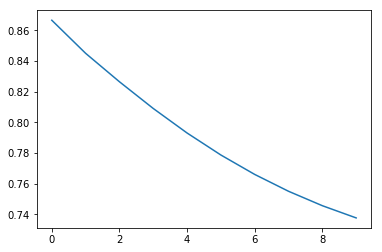

In [189]:
plt.plot(costs)

*todo*

* gpu를 사용한 장시간 학습 테스트
* 레이어 추가나 활성화 함수 변경, 학습률 변경에 따른 효과 확인
* 검증 세트를 활용한 정확도 측정